# Forest Fire Area Prediction

In [45]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [46]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Exploratory Data Anaysis (EDA)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [48]:
# Check if the data set has any missing values. 
df.columns[df.isnull().any()]

Index([], dtype='object')

In [49]:
# Check the shape of the data
df.shape

(517, 13)

In [50]:
df.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


In [51]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace =True)

In [52]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


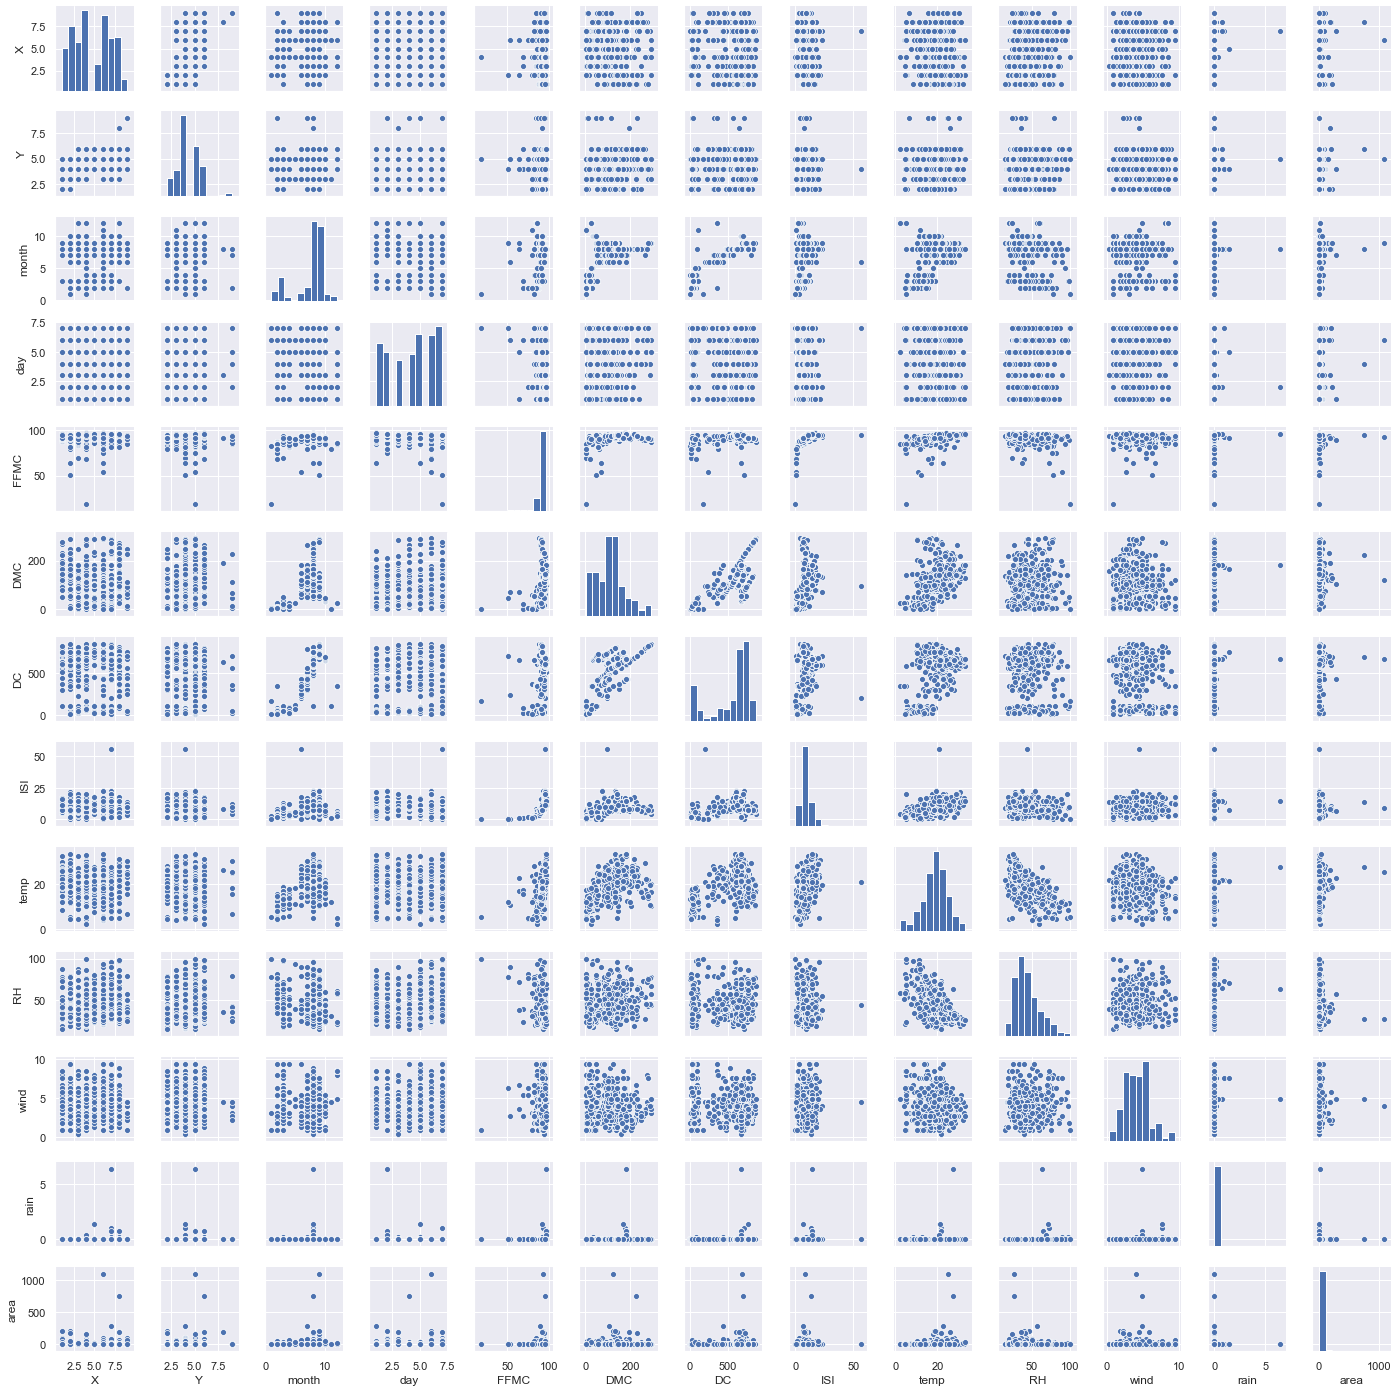

In [53]:
sns.pairplot(df, height=1.5);

## Correlation Analysis and Feature Selection

In [54]:
# Finding the correlation of the data
corr = df.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:               X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003 -0.024922 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.005453 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.050837  0.291477  0.466645  0.868698   
day   -0.024922 -0.005453 -0.050837  1.000000 -0.041068  0.062870  0.000105   
FFMC  -0.021039 -0.046308  0.291477 -0.041068  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.062870  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.000105  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.032909  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.052190  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280  0.092151 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368  0.032478 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.03323

Plotting correlation: 


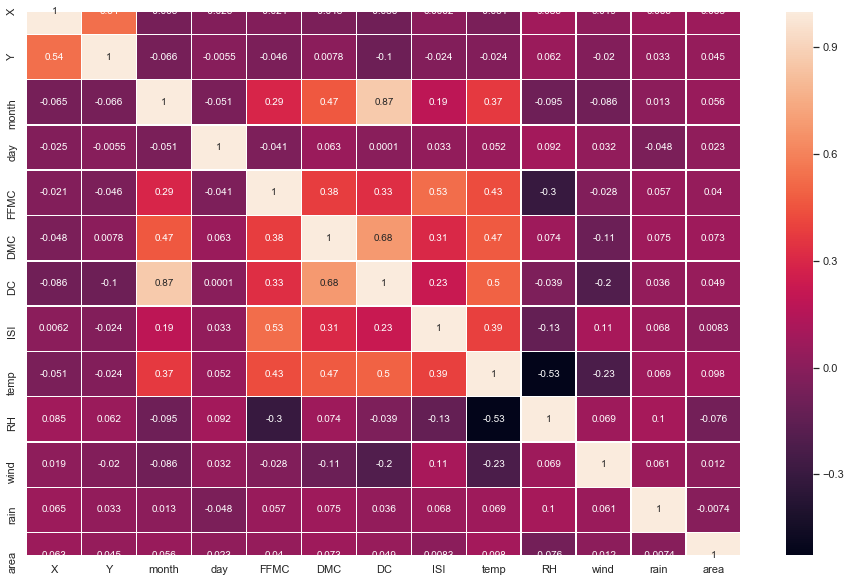

In [55]:
# See the heatmap
f,ax = plt.subplots(figsize=(16, 10))
print("Plotting correlation: ")
sns.heatmap(corr,annot= True, linewidths=.5);

In [56]:
# Value Initialization
x = df.iloc[:,0:12].values
y = df.iloc[:,12].values

In [57]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [58]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
x_train = st_sc.fit_transform(x_train)
x_test = st_sc.transform(x_test)

## Applying Different Algorithm

## Extra Trees Regressor

In [59]:
# Model Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

extraTreesRegressor = ExtraTreesRegressor()
rfe = RFE(extraTreesRegressor,5)

In [64]:
# Fit the model
fit = rfe.fit(x_train, y_train)

In [65]:
print("The number of features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Rankings:", fit.ranking_)

The number of features: 5
Selected Features: [False  True False False False  True False False  True  True  True False]
Feature Rankings: [4 1 7 5 2 1 6 3 1 1 1 8]


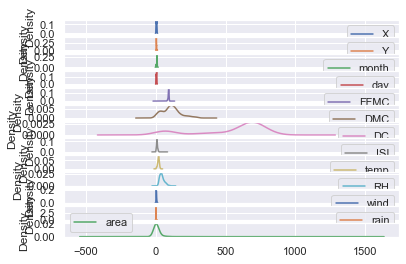

In [70]:
df.plot(kind='density', subplots=True);

## Linear Regression

In [71]:
# Model Selection
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()

In [72]:
# Fit the model
Lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# Prediction
y_pred = Lreg.predict(x_test)
print('Linear Regression:', '\n',y_pred)

Linear Regression: 
 [ 12.22338937   8.23790438  13.68104815  17.98818956  13.49793983
  14.55082093  12.29840715   6.21058442  20.56539104  -1.81257875
   9.24510989  15.71805903  15.82630696   6.31114749  18.5834437
  -3.84294309  14.21840015  13.24669527   0.45756062   9.72167685
  -0.90886211   7.42448679   5.31604357   2.53508349  19.07182534
   2.2775361   11.66669884  16.08527085  15.52720704   5.68255779
   8.66436014  16.86840605   3.11990624  23.6413457   29.1630782
  19.23544611   6.58417318   2.3493047   17.33678961  24.45131608
  -2.76166674   3.05323657   5.71735206   4.20010115   3.82255619
  14.14640339  34.64198005   3.07540046   2.01047977   8.42119028
  16.77813392   2.95975473   3.50335921  11.63514303   4.49618972
   5.93049353   3.30888109   7.37636195   1.52422261   8.33965265
   5.25289085  11.55925003  20.26004885  12.50813789   5.16619857
   1.15692117   8.34976225  17.45703181  13.69109099   8.48234662
   6.96297667  -3.89817551   9.12528166  31.84569008  13.

In [78]:
# Make Variance score, Mean absolute score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

print('Logistic Regression:')
print('\n')
score = explained_variance_score(y_test, y_pred)
print("Variance Score:")
print(score)
print('\n')
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:")
print(mae)

Logistic Regression:


Variance Score:
0.011947087168009518


Mean Absolute Error:
23.44564226641499


## Lasso Regression

In [79]:
# Model Selection
from sklearn.linear_model import Lasso
lasso = Lasso()

In [80]:
# Fit the model
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
# Prediction
y_pred = lasso.predict(x_test)
print('Lasso Regression:', '\n',y_pred)

Lasso Regression: 
 [ 8.58383434  5.3219905  15.73838799 14.46987237 13.43311485 14.53437472
  9.35267442  9.28356279 17.25146149  0.90027535 11.303845    7.31079885
  9.9819611   5.71604264 17.37956538  1.06583438 13.27961239 10.60163022
  2.68728312  8.36012773  6.35013543 10.60814636  5.36193724  7.10429815
 14.73796475  7.65465829 13.72422131 15.45060262 15.52652795  9.72396876
  9.4567186  12.41366922  9.87480949 18.75091291 23.92406421 17.47534849
  4.63439413 11.41112775 15.43061264 19.47873333  0.79615082  7.86614189
  9.90224764  8.44605047  8.93195226 14.69136217 26.60890096  7.7990324
  5.74205261 12.30696412 14.68104982  9.95596626  6.21507668 13.24802698
  9.28383589  9.74639908  7.00317593  6.66531336  7.53370514 12.10074517
  9.35858708  9.45967984 14.59489305 12.36285247  9.54021823  5.54806809
 10.60216372 12.96991614 12.58555233  8.51886199  9.27277292  5.83487151
 11.47235273 24.2053611  13.08055787  5.69293728 18.55607344  6.06537896
 11.06251972  5.0589414   7.8337

In [83]:
# Make Variance score, Mean absolute score
print('Lasso Regression:')
print('\n')
score = explained_variance_score(y_test, y_pred)
print("Variance Score:")
print(score)
print('\n')
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:")
print(mae)

Lasso Regression:


Variance Score:
0.00923995080811657


Mean Absolute Error:
23.25954168178748


## Ridge Regression

In [84]:
# Model Selection
from sklearn.linear_model import Ridge
ridge = Ridge()

In [85]:
# Fit the model
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
# Prediction
y_pred = ridge.predict(x_test)
print('Ridge Regression:', '\n',y_pred)

Ridge Regression: 
 [12.21578414  8.11037732 13.83488963 17.96324498 13.56352392 14.57904715
 12.32574583  6.17311335 20.49031762 -1.76926673  9.21754016 15.42873177
 15.64853249  6.33669881 18.52949387 -3.89228046 14.18098629 13.19131783
  0.53393836  9.61692767 -0.78773546  7.50539637  5.47288562  2.63295895
 18.94059135  2.34833582 11.76511772 16.07854049 15.63556603  5.79099941
  8.70465302 16.75109098  3.23845667 23.60414116 29.05752979 19.24138007
  6.57980691  2.4315585  17.31893509 24.41010078 -2.60952646  3.15558343
  5.8321253   4.28740222  3.90809741 14.16987157 34.61223883  3.19457254
  2.0635714   8.515892   16.79220015  3.07900087  3.57861458 11.76712694
  4.63568108  5.95363388  3.45976976  7.48950456  1.69146435  8.42623933
  5.37303927 11.53996342 20.1841431  12.51454563  5.30020415  1.12495781
  8.41071143 17.36021455 13.79967257  8.51541108  7.01396398 -3.76539683
  9.25700695 31.74560774 13.12611218  5.0458729  22.12476565  3.63715662
  5.51393183 -4.76505391  4.578

In [88]:
# Make Variance score, Mean absolute score
print('Ridge Regression:')
print('\n')
score = explained_variance_score(y_test, y_pred)
print("Variance Score:")
print(score)
print('\n')
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:")
print(mae)

Ridge Regression:


Variance Score:
0.011902862227577415


Mean Absolute Error:
23.43636277372173


## K-Neighbors Regressor

In [90]:
# Model Selection
from sklearn.neighbors import KNeighborsRegressor
knreg = KNeighborsRegressor()

In [91]:
# Fit the model
knreg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [92]:
# Prediction
y_pred = knreg.predict(x_test)
print('K-Neighbors Regression:', '\n',y_pred)

K-Neighbors Regression: 
 [1.01880e+01 2.60200e+00 1.72300e+01 2.81800e+00 1.00900e+01 1.05060e+01
 1.27320e+01 9.36400e+00 8.96400e+00 1.42420e+01 4.11000e+00 1.26240e+01
 1.89200e+00 8.67000e+00 4.20400e+00 1.01300e+01 2.75200e+00 1.27200e+00
 1.11000e+00 8.82000e-01 1.14680e+01 3.90000e+00 3.10800e+00 4.31620e+01
 3.77580e+01 3.20120e+01 2.78800e+00 3.18200e+00 3.39400e+00 2.09940e+01
 5.32000e+00 4.47200e+00 3.52800e+00 1.63648e+02 1.49346e+02 1.30520e+01
 0.00000e+00 9.74000e-01 3.12800e+00 1.50828e+02 1.05000e+00 1.49800e+00
 1.03980e+01 9.38000e-01 2.09820e+01 1.25800e+01 1.52418e+02 6.67400e+00
 4.25760e+01 3.77600e+00 3.25400e+00 6.11400e+00 6.65600e+00 7.56000e-01
 2.24800e+00 3.44000e+00 3.22600e+00 2.26400e+00 1.30100e+01 1.46980e+01
 1.04840e+01 5.71600e+00 1.43900e+01 2.86400e+00 2.50120e+01 2.02000e-01
 3.29500e+01 2.03220e+01 4.58000e+00 1.84400e+00 1.35400e+01 8.22000e+00
 1.42440e+01 1.49982e+02 2.39080e+01 1.74600e+00 5.98800e+00 0.00000e+00
 8.66000e-01 8.94000e+00 

In [93]:
# Make Variance score, Mean absolute score
print('K-Neighbors Regression:')
print('\n')
score = explained_variance_score(y_test, y_pred)
print("Variance Score:")
print(score)
print('\n')
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:")
print(mae)

K-Neighbors Regression:


Variance Score:
-0.11468069673231684


Mean Absolute Error:
28.662753846153848


## Random Forest Regressor

In [95]:
# Model Selection
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()

In [96]:
# Fit the model
rfreg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
# Prediction
y_pred = rfreg.predict(x_test)
print('Random Forest Regression:', '\n',y_pred)

Random Forest Regression: 
 [2.93617000e+01 6.92710000e+00 1.12017000e+01 3.61020000e+00
 9.52720000e+00 1.34617048e+01 1.04570200e+01 6.76950000e+00
 3.64590000e+00 4.32230000e+00 1.65490000e+00 1.59121267e+01
 9.67620000e+00 7.93410000e+00 7.49850000e+00 4.64560000e+00
 5.74270000e+00 8.01775000e+01 8.56060000e+00 2.13060000e+01
 1.09821000e+01 3.28540000e+00 2.98552000e+01 4.60854000e+01
 1.80149000e+01 2.28684667e+01 5.87680000e+00 1.22689000e+01
 1.48567000e+01 2.91843333e+00 1.18888000e+01 6.60560000e+00
 4.98900000e+00 2.63795000e+01 1.21266500e+02 9.29500000e-01
 9.28600000e-01 4.15140000e+00 2.99057000e+01 6.69842000e+01
 2.71107000e+01 1.92620000e+00 6.20450000e+00 4.71560000e+00
 6.20340000e+00 3.48690000e+00 3.84498100e+02 4.27910000e+00
 5.31200000e-01 6.29120000e+00 1.76784667e+01 5.23490000e+00
 7.51980000e+00 7.85393333e+00 1.81078000e+01 6.92930000e+00
 2.55799667e+01 5.13506667e+00 7.14186667e+00 5.00010000e+00
 3.40840000e+00 2.19300000e+00 9.38610000e+00 9.17606667e

In [99]:
# Make Variance score, Mean absolute score
print('Random Forest Regression:')
print('\n')
score = explained_variance_score(y_test, y_pred)
print("Variance Score:")
print(score)
print('\n')
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:")
print(mae)

Random Forest Regression:


Variance Score:
-0.10993297655458667


Mean Absolute Error:
27.43253624175824


## Support Vector Regressor

In [100]:
# Model Selection
from sklearn.svm import SVR
svr = SVR()

In [101]:
# Fit the model
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [102]:
# Prediction
y_pred = svr.predict(x_test)
print('Support Vector Regression:', '\n',y_pred)

Support Vector Regression: 
 [ 1.87900014  1.23052964  1.98999785  0.92047041  1.98265826  0.81781753
  0.65058542  0.76122586  0.74447105  0.66575439  1.14325177  5.12629457
  0.69450185  0.11556566  0.30472763  0.48785842 -0.06617691  0.59707048
  0.14346865  0.50358353  2.18069693 -0.12049557  1.76552309  0.03281025
  0.73206044  0.5494735   1.88799766  0.4603453   1.49435889  1.38169056
  1.3371176   0.42849246  0.50691773  1.06264844  0.77662131  0.32012301
 -0.18624093  0.41621196  0.71993246  0.46801433  0.52796267  1.30463746
  0.79641065  1.37673713  1.0295109   0.51378783  0.6289126   1.48760651
 -0.0497884   0.85673806  1.26413926  0.70402514  0.71250941  0.44920356
  0.35362599  1.381817    0.96648514  1.08028971  0.9546851   1.47518447
  1.01924497  1.56297534  1.01622461  0.34351754  1.51669671  0.04033818
  0.83736922  1.15269368  0.81963951  0.5323308   0.83622978  0.80453856
  1.18676397  0.65453791  1.05410054  1.50878769  0.23349115 -0.27958032
  1.07395087  1.072728

In [103]:
# Make Variance score, Mean absolute score
print('Support Vector Regression:')
print('\n')
score = explained_variance_score(y_test, y_pred)
print("Variance Score:")
print(score)
print('\n')
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:")
print(mae)

Support Vector Regression:


Variance Score:
-0.0006128334385477885


Mean Absolute Error:
20.170935908277205


***